# DZ «Временные ряды, общая теория»

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# graph in notebook cell
%matplotlib inline 

# graph in separate window
# %matplotlib qt 

# Тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

# Для нормализации дисперсии
from scipy.stats import boxcox

# Коррелограммы
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

In [2]:
# Series
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")
closing_of_dowjones = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
air_temperature = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
airline_passengers = pd.read_csv("Series/international-airline-passengers.csv")
boston_armed_robberies_j = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
sales_of_company_x_jan_6 = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")

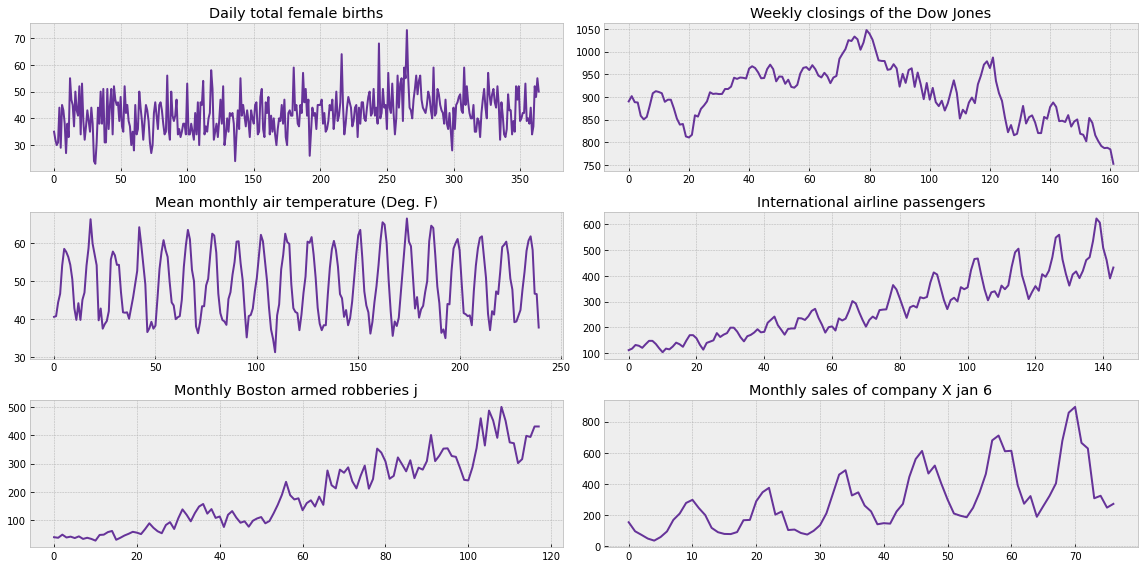

In [4]:
# Визуализация данных
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='rebeccapurple')
        ts_ax.set_title(key)
        
    plt.tight_layout()
#     plt.show()


In [5]:
# Dickey-Fuller test
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [6]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='rebeccapurple', label='Or')
        ts_ax.set_title('Original')

        tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [9]:
# series = pd.read_csv("Series/international-airline-passengers.csv")['Count']
# type(series)

pandas.core.series.Series

In [14]:
series_births = female_births['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


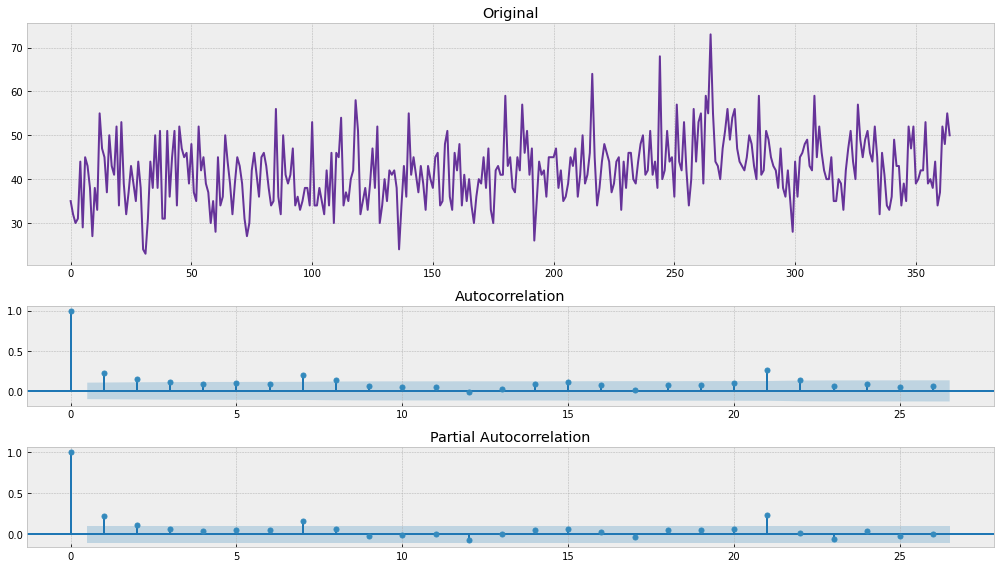

In [15]:
tsplot(series_births)

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


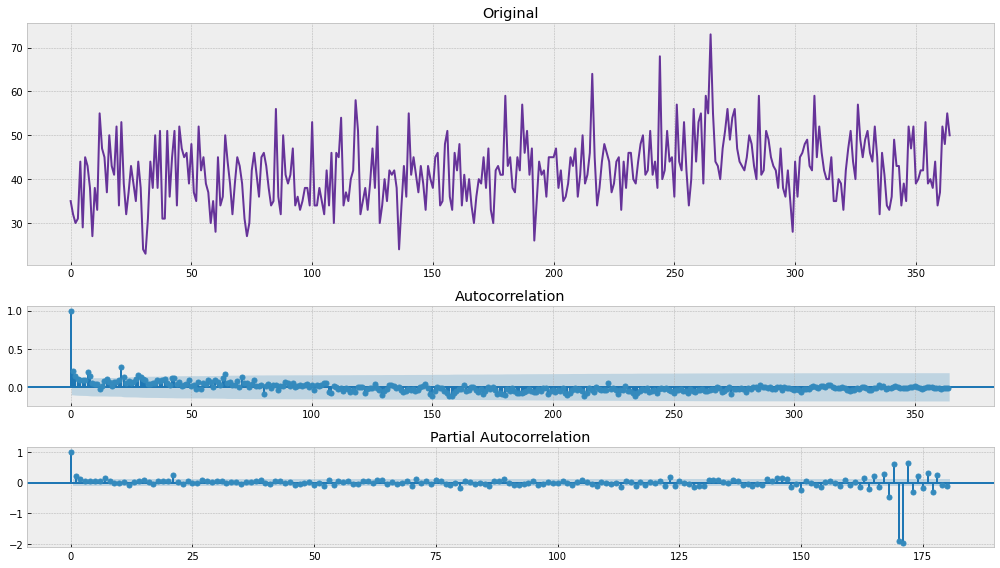

In [67]:
# test_stationarity(series_births)
# if not isinstance(series_births, pd.Series):
#     series_births = pd.Series(series_births)
# with plt.style.context('bmh'):
#     plt.figure(figsize=(14, 8))
#     layout = (4, 1)
#     ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
#     acf_ax = plt.subplot2grid(layout, (2, 0))
#     pacf_ax = plt.subplot2grid(layout, (3, 0))

#     series_births.plot(ax=ts_ax, color='rebeccapurple', label='Or')
#     ts_ax.set_title('Original')

#     tsa.graphics.plot_acf(series_births, lags=364, ax=acf_ax, alpha=0.05)
#     tsa.graphics.plot_pacf(series_births, lags=180, ax=pacf_ax, alpha=0.05)

#     plt.tight_layout()

!!! Ряд "Daily total female births" является стационарным: параметр p-value=0.000052

In [29]:
series_dowjones = closing_of_dowjones['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


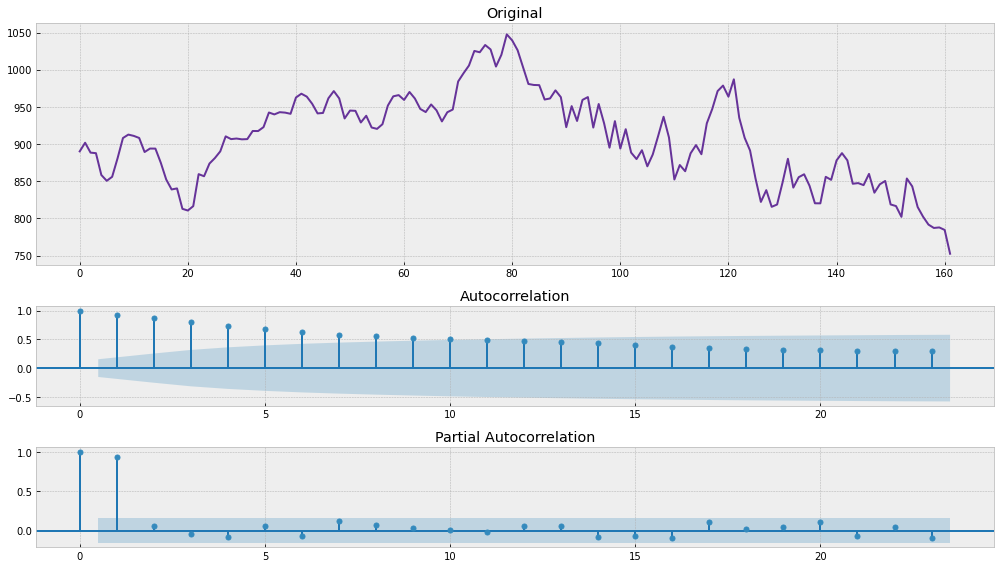

In [30]:
tsplot(series_dowjones)

In [33]:
# Нормализуем дисперсию
series_dowjones = boxcox(series_dowjones, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


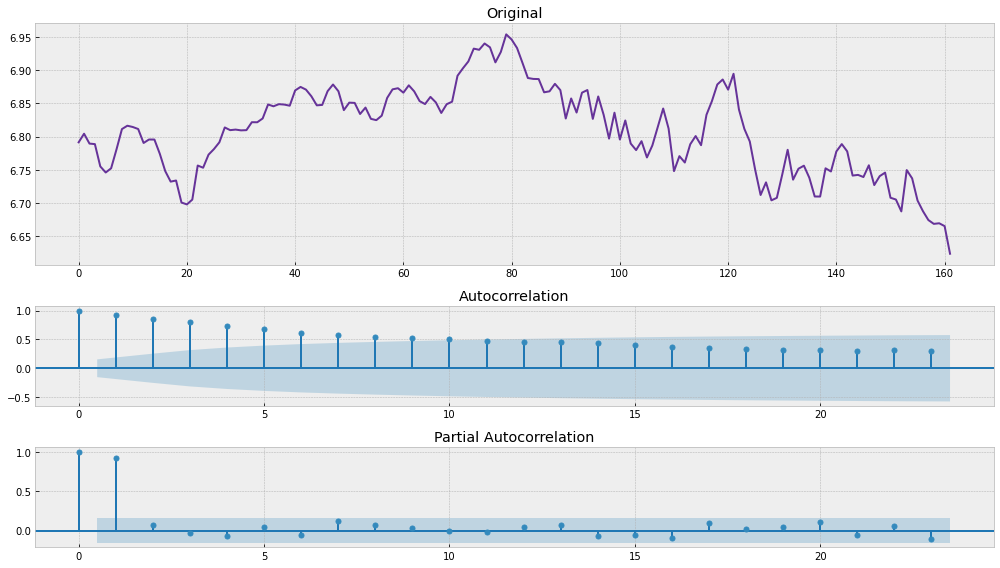

In [34]:
tsplot(series_dowjones)

Нормализация дисперсии не дала ничего

In [35]:
# Дифференциируем
series_dowjones = np.diff(series_dowjones, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


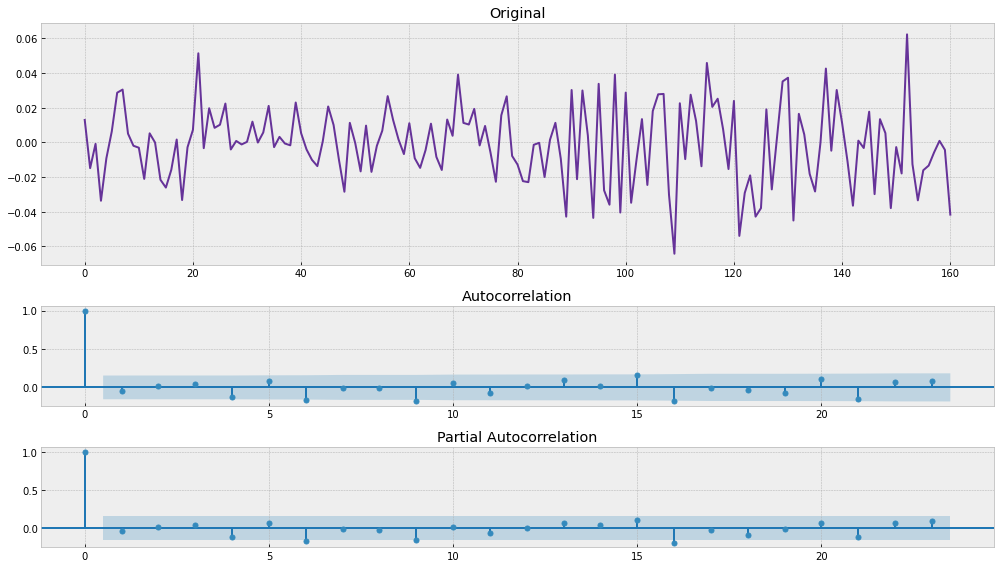

In [36]:
tsplot(series_dowjones)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


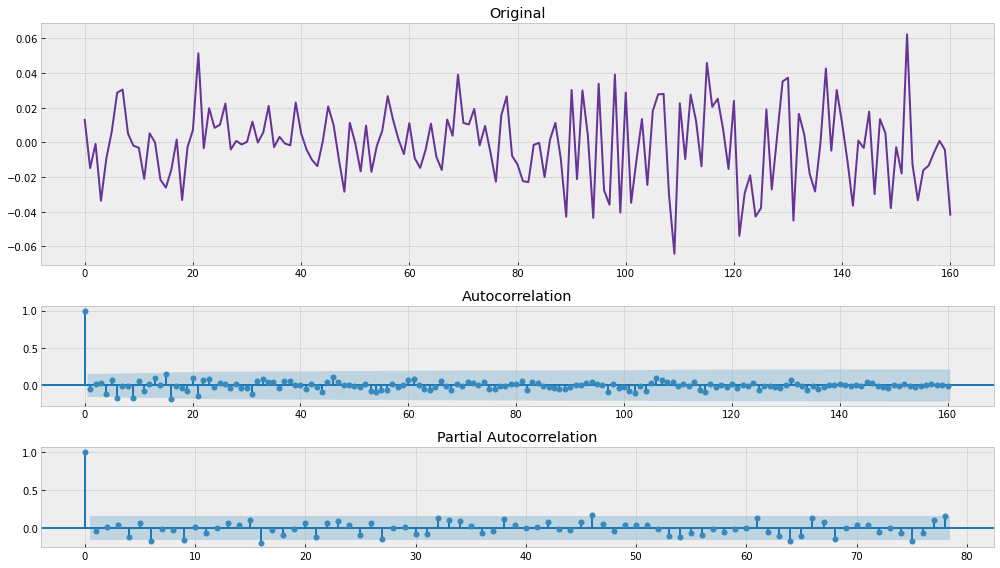

In [70]:
# test_stationarity(series_dowjones)
# if not isinstance(series_dowjones, pd.Series):
#     series_dowjones = pd.Series(series_dowjones)
# with plt.style.context('bmh'):
#     plt.figure(figsize=(14, 8))
#     layout = (4, 1)
#     ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
#     acf_ax = plt.subplot2grid(layout, (2, 0))
#     pacf_ax = plt.subplot2grid(layout, (3, 0))

#     series_dowjones.plot(ax=ts_ax, color='rebeccapurple', label='Or')
#     ts_ax.set_title('Original')

#     tsa.graphics.plot_acf(series_dowjones, lags=160, ax=acf_ax, alpha=0.05)
#     tsa.graphics.plot_pacf(series_dowjones, lags=78, ax=pacf_ax, alpha=0.05)

#     plt.tight_layout()

!!! Ряд "Weekly closings of the Dow Jones" является стационарным: параметр p-value=2.751609e-24

In [47]:
series_temperature = air_temperature['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


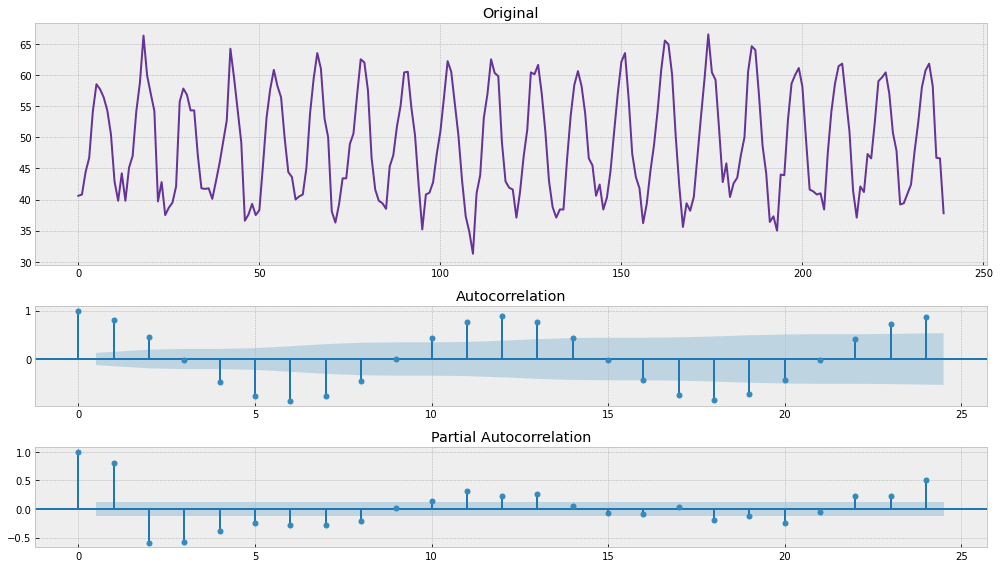

In [48]:
tsplot(series_temperature)

In [49]:
# Нормализуем дисперсию
series_temperature = boxcox(series_temperature, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


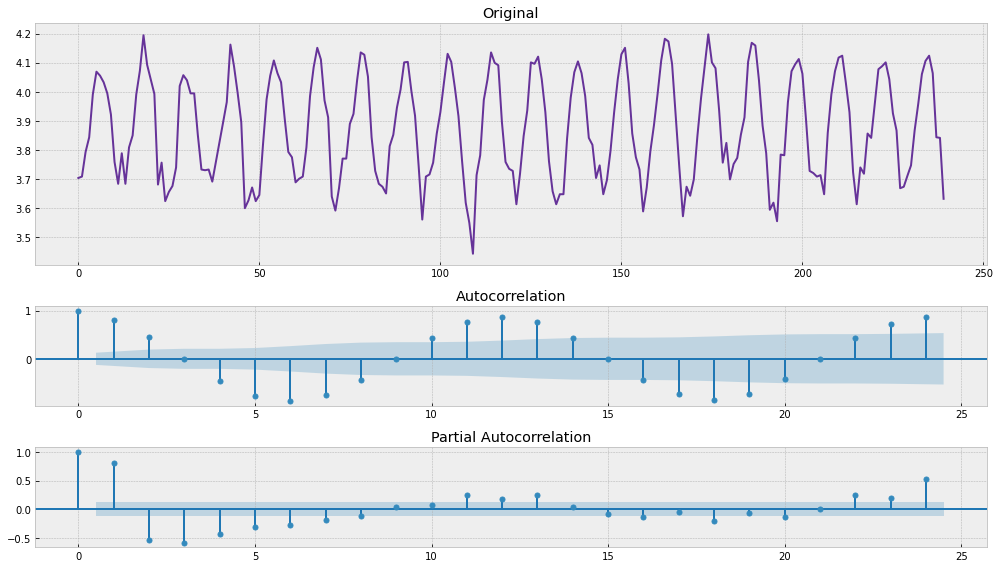

In [50]:
tsplot(series_temperature)

Тренда нет, не дифференцирую

In [51]:
# Уберем сезонность
series_temperature = series_temperature[12:] - series_temperature[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


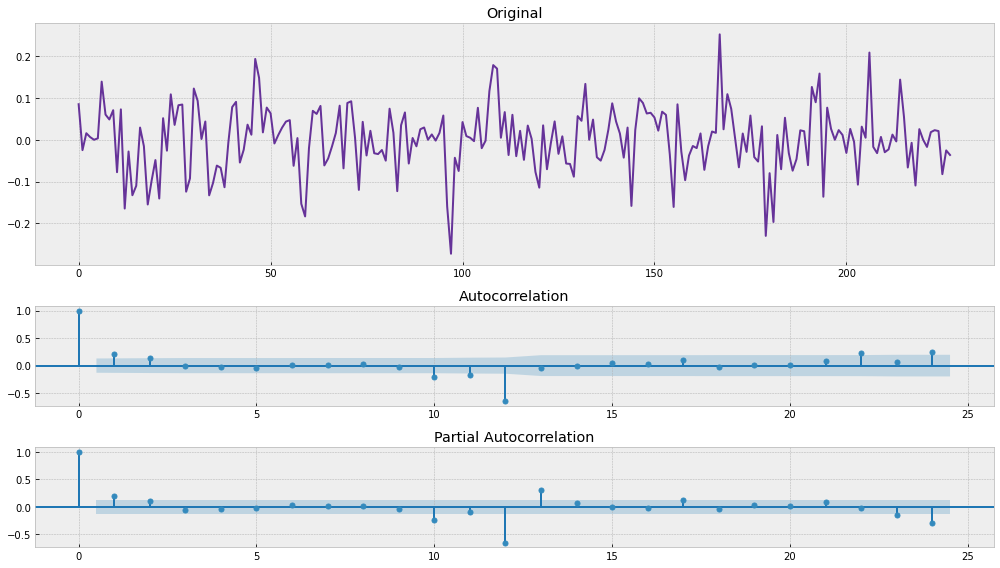

In [52]:
tsplot(series_temperature)

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


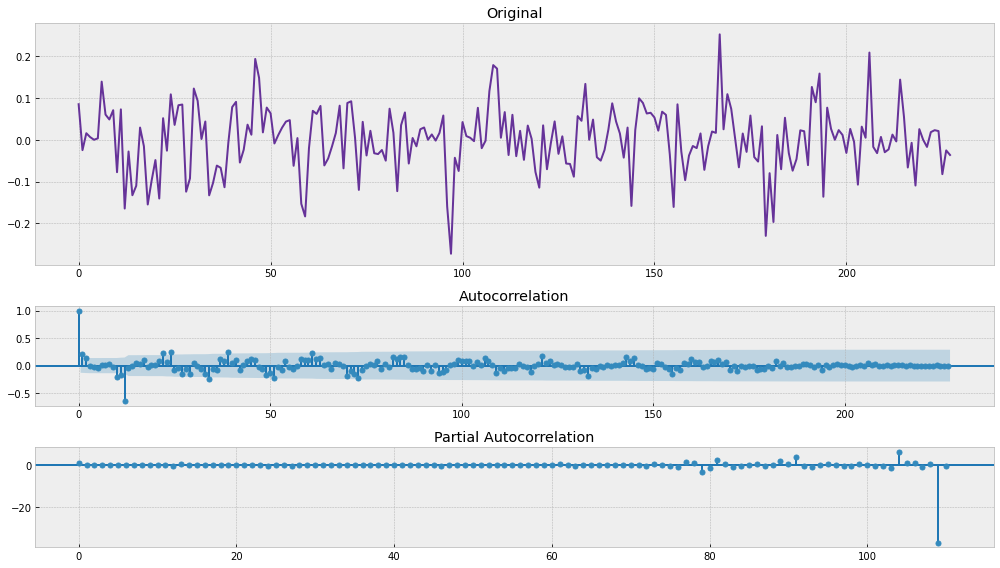

In [74]:
# test_stationarity(series_temperature)
# if not isinstance(series_temperature, pd.Series):
#     series_temperature = pd.Series(series_temperature)
# with plt.style.context('bmh'):
#     plt.figure(figsize=(14, 8))
#     layout = (4, 1)
#     ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
#     acf_ax = plt.subplot2grid(layout, (2, 0))
#     pacf_ax = plt.subplot2grid(layout, (3, 0))

#     series_temperature.plot(ax=ts_ax, color='rebeccapurple', label='Or')
#     ts_ax.set_title('Original')

#     tsa.graphics.plot_acf(series_temperature, lags=227, ax=acf_ax, alpha=0.05)
#     tsa.graphics.plot_pacf(series_temperature, lags=110, ax=pacf_ax, alpha=0.05)

#     plt.tight_layout()

!!! Ряд "Mean monthly air temperature (Deg. F)" является стационарным: параметр p-value=1.883599e-08

In [55]:
series_passengers = airline_passengers['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


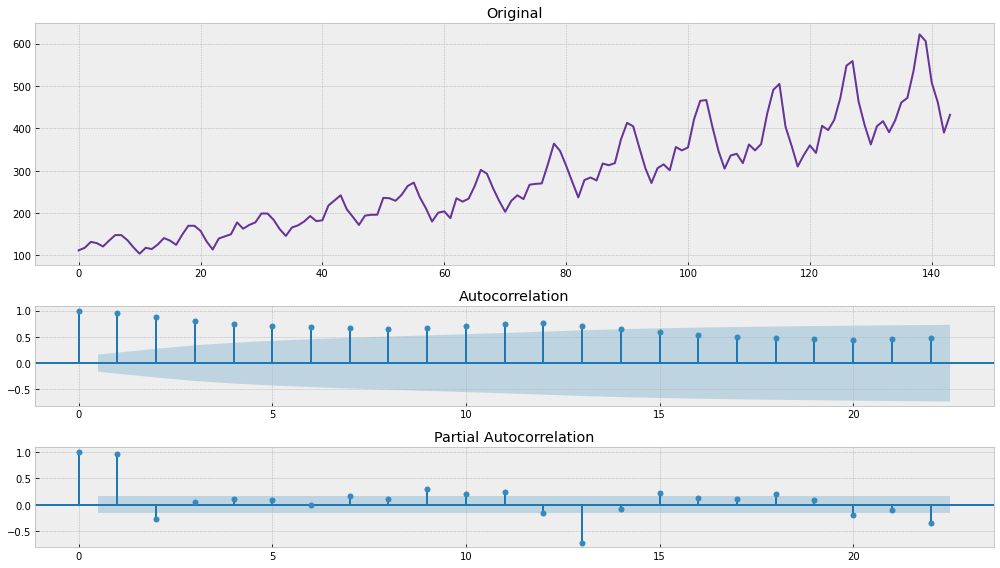

In [56]:
tsplot(series_passengers)

In [58]:
# Нормализуем дисперсию
series_passengers = boxcox(series_passengers, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


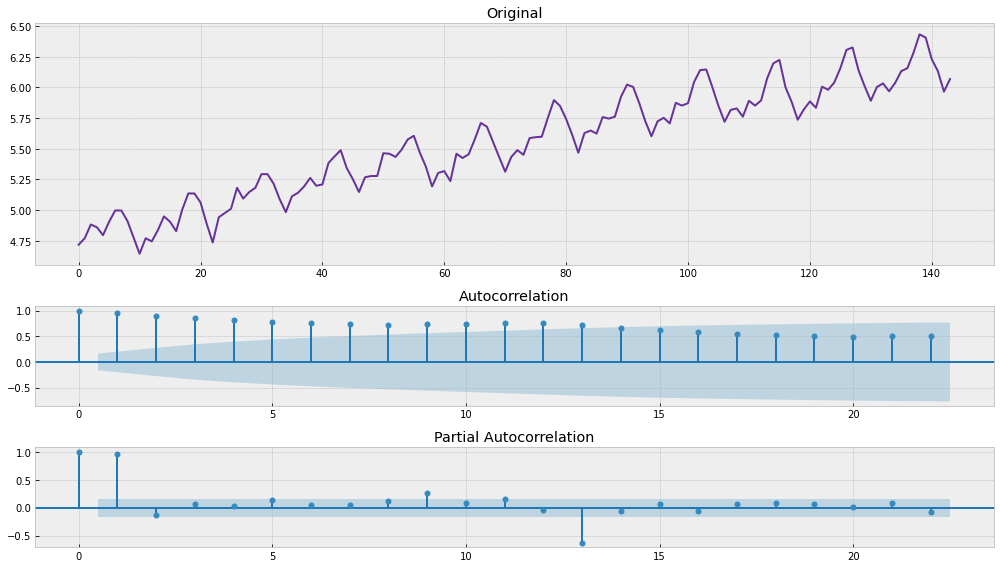

In [59]:
tsplot(series_passengers)

In [60]:
# Дифференциируем - уберем тренд
series_passengers = np.diff(series_passengers, 1)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


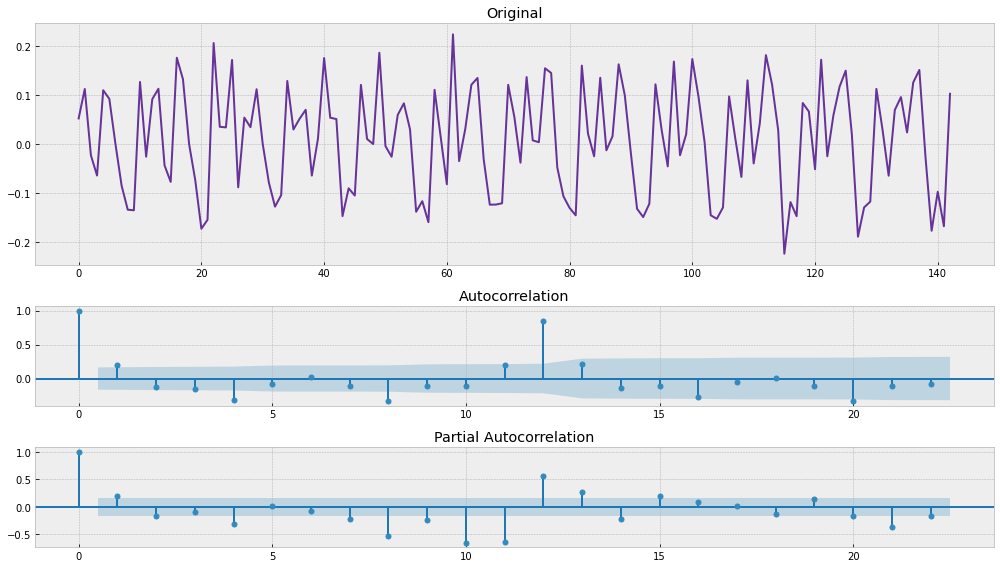

In [61]:
tsplot(series_passengers)

In [62]:
# Уберем сезонность
series_passengers = series_passengers[12:] - series_passengers[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


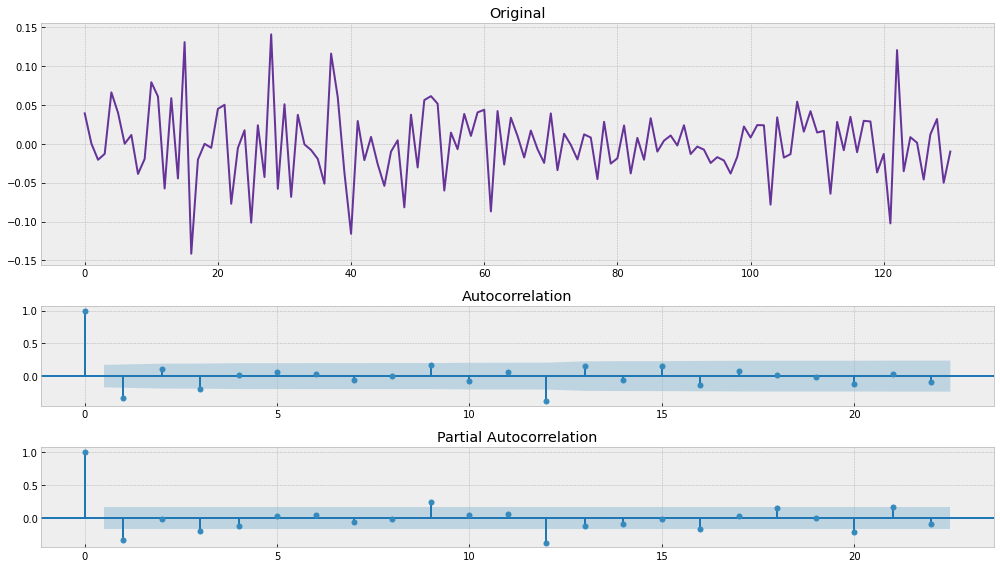

In [63]:
tsplot(series_passengers)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


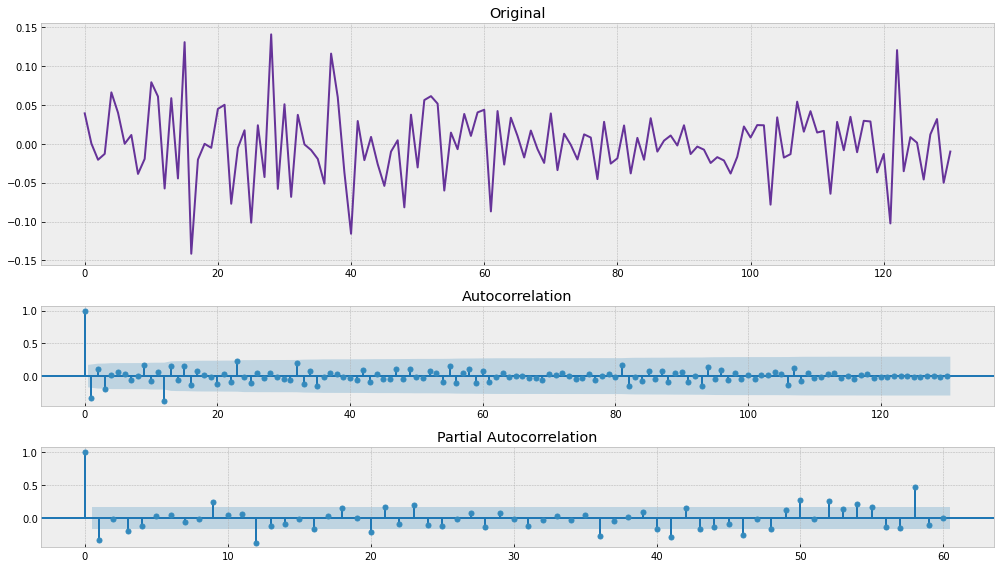

In [75]:
# test_stationarity(series_passengers)
# if not isinstance(series_passengers, pd.Series):
#     series_passengers = pd.Series(series_passengers)
# with plt.style.context('bmh'):
#     plt.figure(figsize=(14, 8))
#     layout = (4, 1)
#     ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
#     acf_ax = plt.subplot2grid(layout, (2, 0))
#     pacf_ax = plt.subplot2grid(layout, (3, 0))

#     series_passengers.plot(ax=ts_ax, color='rebeccapurple', label='Or')
#     ts_ax.set_title('Original')

#     tsa.graphics.plot_acf(series_passengers, lags=130, ax=acf_ax, alpha=0.05)
#     tsa.graphics.plot_pacf(series_passengers, lags=60, ax=pacf_ax, alpha=0.05)

#     plt.tight_layout()

!!! Ряд "International airline passengers" является стационарным: параметр p-value=0.000249

In [85]:
series_roberies = boston_armed_robberies_j['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


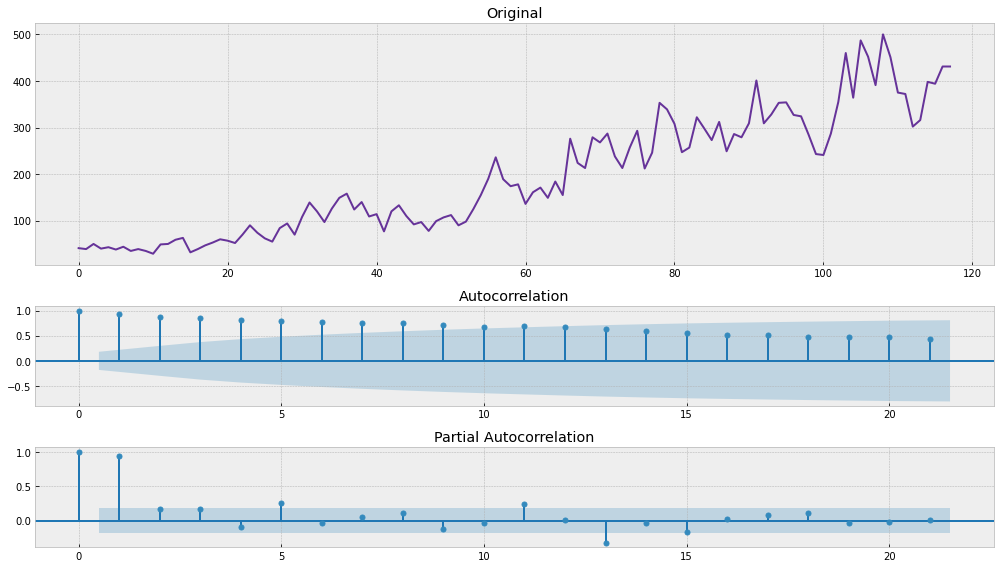

In [86]:
tsplot(series_roberies)

In [87]:
# Нормализуем дисперсию
series_roberies = boxcox(series_roberies, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


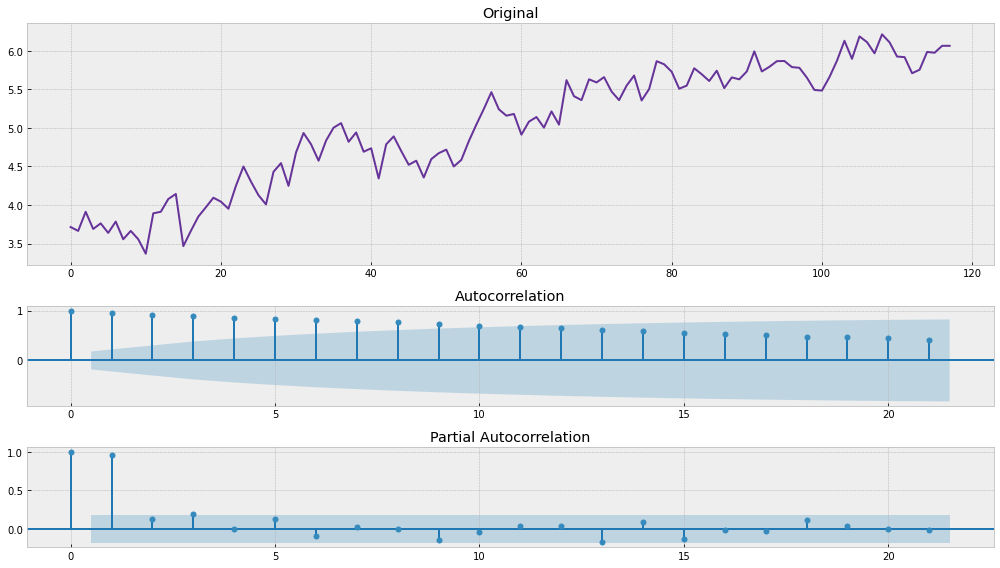

In [88]:
tsplot(series_roberies)

In [89]:
# Дифференциируем - уберем тренд
series_roberies = np.diff(series_roberies, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


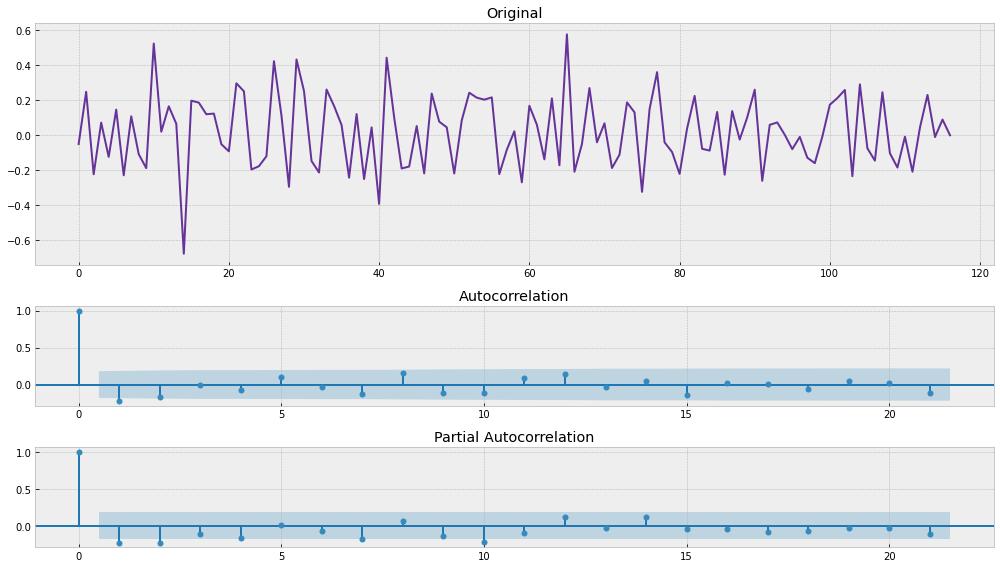

In [90]:
tsplot(series_roberies)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


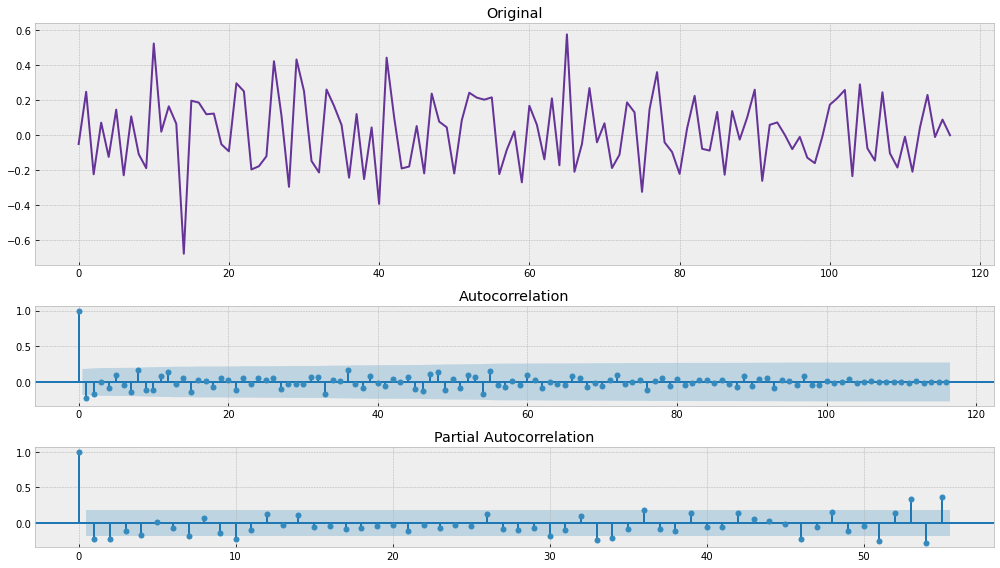

In [83]:
# test_stationarity(series_roberies)
# if not isinstance(series_roberies, pd.Series):
#     series_roberies = pd.Series(series_roberies)
# with plt.style.context('bmh'):
#     plt.figure(figsize=(14, 8))
#     layout = (4, 1)
#     ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
#     acf_ax = plt.subplot2grid(layout, (2, 0))
#     pacf_ax = plt.subplot2grid(layout, (3, 0))

#     series_roberies.plot(ax=ts_ax, color='rebeccapurple', label='Or')
#     ts_ax.set_title('Original')

#     tsa.graphics.plot_acf(series_roberies, lags=116, ax=acf_ax, alpha=0.05)
#     tsa.graphics.plot_pacf(series_roberies, lags=55, ax=pacf_ax, alpha=0.05)

#     plt.tight_layout()

!!! Ряд "Monthly Boston armed robberies j" является стационарным: параметр p-value=2.378602e-11

In [91]:
series_sales = sales_of_company_x_jan_6['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


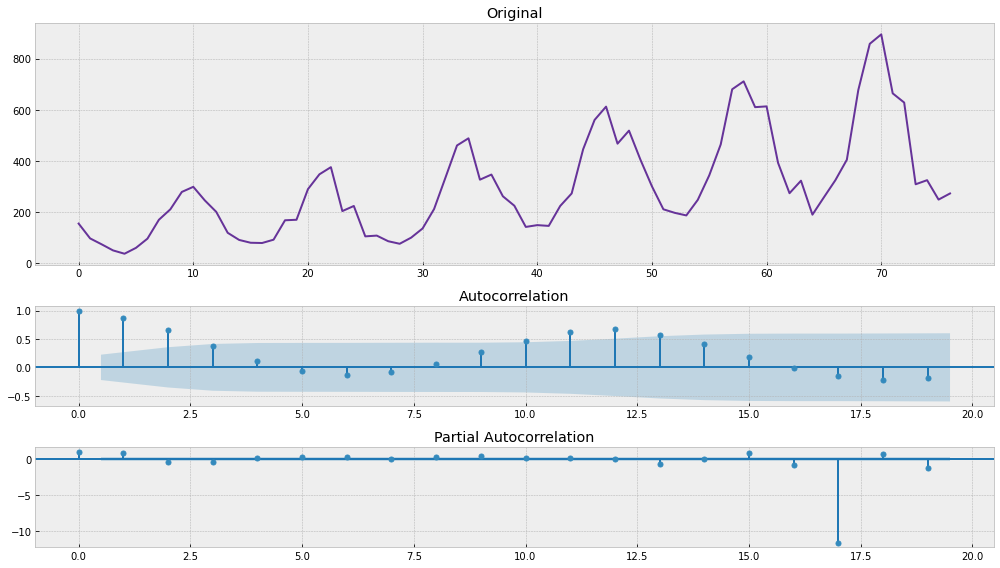

In [92]:
tsplot(series_sales)

In [93]:
# Нормализуем дисперсию
series_sales = boxcox(series_sales, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


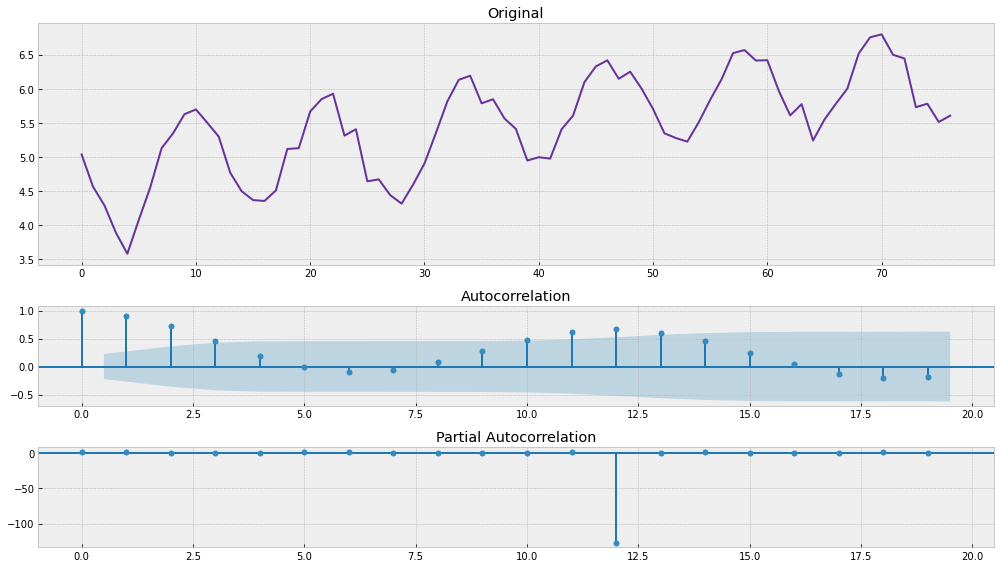

In [94]:
tsplot(series_sales)

In [95]:
# Дифференциируем - уберем тренд
series_sales = np.diff(series_sales, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


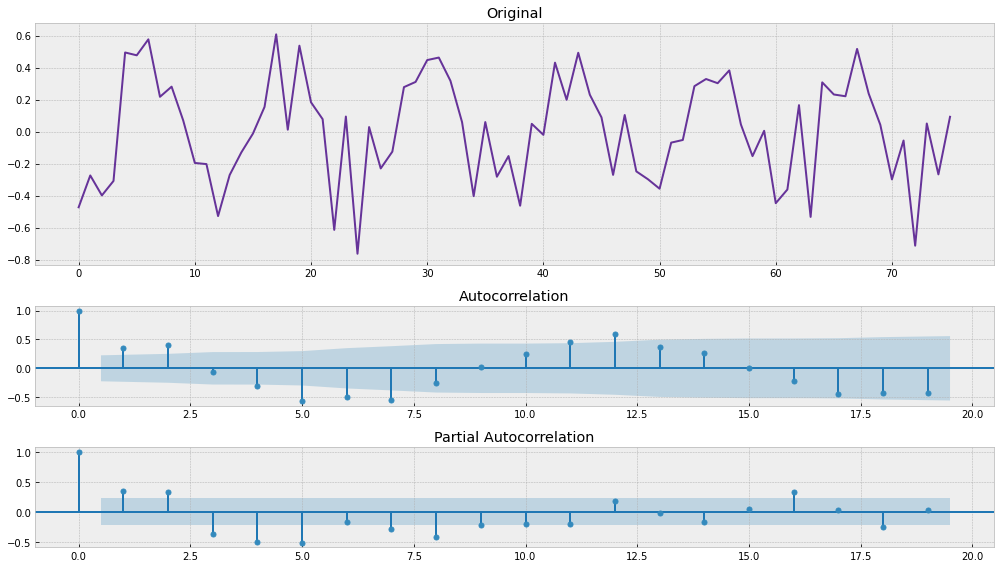

In [96]:
tsplot(series_sales)

In [97]:
# Уберем сезонность
series_sales = series_sales[12:] - series_sales[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


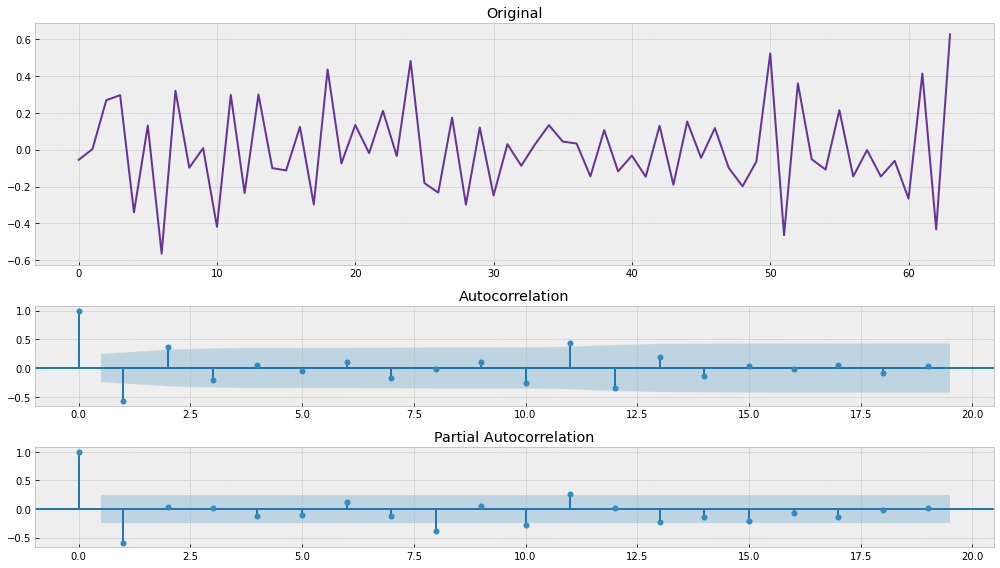

In [98]:
tsplot(series_sales)

In [99]:
# Дифференциируем 2 раз, поскольку p-value еще большое
series_sales = np.diff(series_sales, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


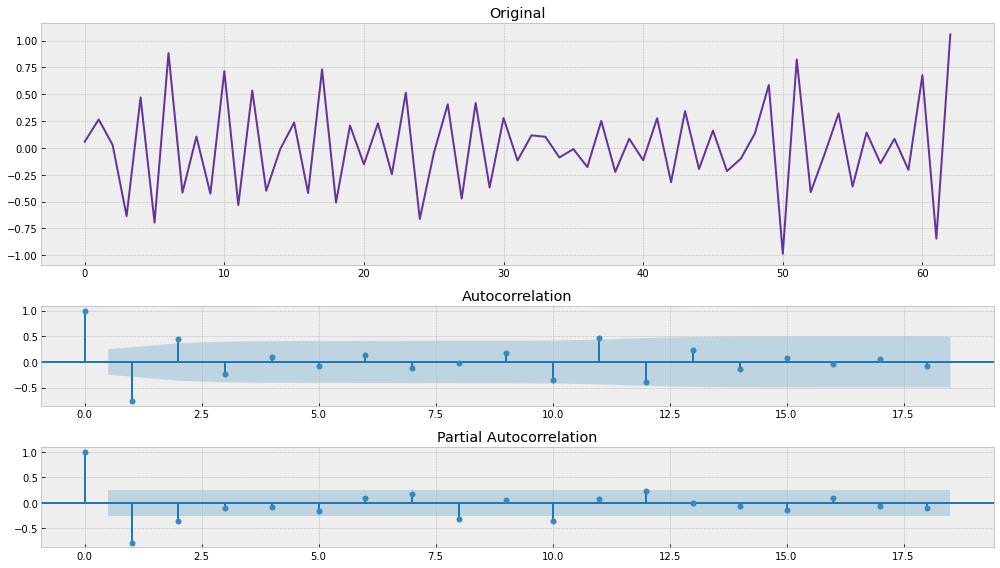

In [100]:
tsplot(series_sales)

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


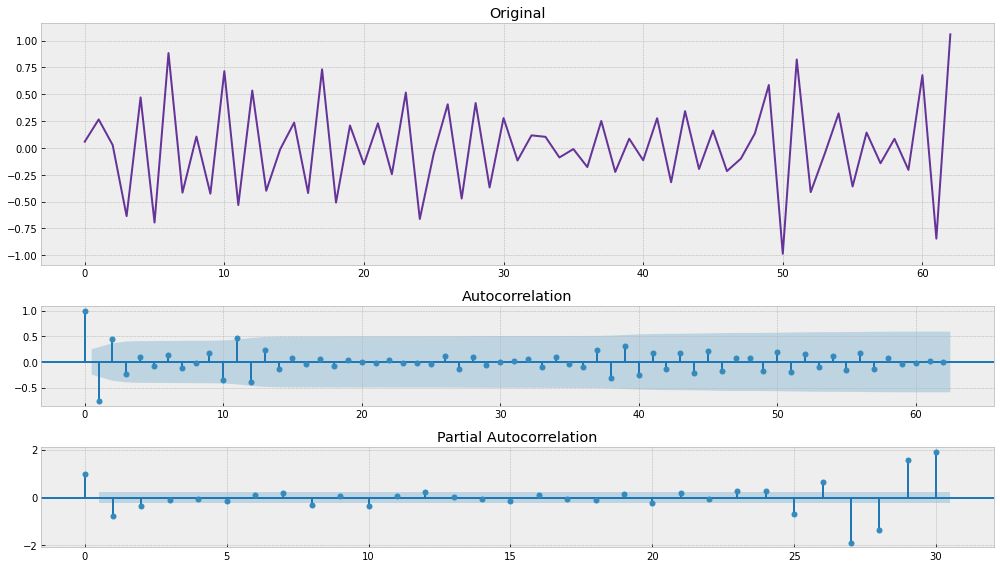

In [103]:
test_stationarity(series_sales)
if not isinstance(series_sales, pd.Series):
    series_sales = pd.Series(series_sales)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    layout = (4, 1)
    ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
    acf_ax = plt.subplot2grid(layout, (2, 0))
    pacf_ax = plt.subplot2grid(layout, (3, 0))

    series_sales.plot(ax=ts_ax, color='rebeccapurple', label='Or')
    ts_ax.set_title('Original')

    tsa.graphics.plot_acf(series_sales, lags=62, ax=acf_ax, alpha=0.05)
    tsa.graphics.plot_pacf(series_sales, lags=30, ax=pacf_ax, alpha=0.05)

    plt.tight_layout()

!!! Ряд "Monthly sales of company X jan 6" является стационарным: параметр p-value=0.000006